# Requirements

In [1]:
#!pip install tensorflow keras

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
# Add as many imports as you need.

## Introduction
In this laboratory assignment, the focus is on time series forecasting, specifically targeting the prediction of the current **close price** for Bitcoin. To accomplish this, you will use data from the preceding 7 days, and past statistics. 


## The Amazon Stock Price Dataset

The dataset comprises the following columns:
- date - the date of the recorded price
- symbol - the resource for prediction
- open - the open price of BTC
- high - the high price of BTC
- low - the low price of BTC
- volumeBTC - the volume of trades BTC
- volumeUSD - the volume of trades USD
- close - the close price of BTC

Target:
close

Load the dataset into a `pandas` data frame.

In [4]:
# Write your code here. Add as many boxes as you need.
df = pd.read_csv('BTC-Daily.csv')
df.head()

,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,3/1/2022 0:00,BTC/USD,43221.71,43626.49,43185.48,43185.48,49.006289,2.116360e+06
1,2/28/2022 0:00,BTC/USD,37717.10,44256.08,37468.99,43178.98,3160.618070,1.364723e+08
2,2/27/2022 0:00,BTC/USD,39146.66,39886.92,37015.74,37712.68,1701.817043,6.418008e+07
3,2/26/2022 0:00,BTC/USD,39242.64,40330.99,38600.00,39146.66,912.724087,3.573010e+07
4,2/25/2022 0:00,BTC/USD,38360.93,39727.97,38027.61,39231.64,2202.851827,8.642149e+07


In [5]:
df.isnull().sum()

date          0
symbol        0
open          0
high          0
low           0
close         0
Volume BTC    0
Volume USD    0
dtype: int64

In [6]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date',inplace=True)
df.head()

,symbol,open,high,low,close,Volume BTC,Volume USD
date,,,,,,,
2022-03-01,BTC/USD,43221.71,43626.49,43185.48,43185.48,49.006289,2.116360e+06
2022-02-28,BTC/USD,37717.10,44256.08,37468.99,43178.98,3160.618070,1.364723e+08
2022-02-27,BTC/USD,39146.66,39886.92,37015.74,37712.68,1701.817043,6.418008e+07
2022-02-26,BTC/USD,39242.64,40330.99,38600.00,39146.66,912.724087,3.573010e+07
2022-02-25,BTC/USD,38360.93,39727.97,38027.61,39231.64,2202.851827,8.642149e+07


Explore the dataset using visualizations of your choice.

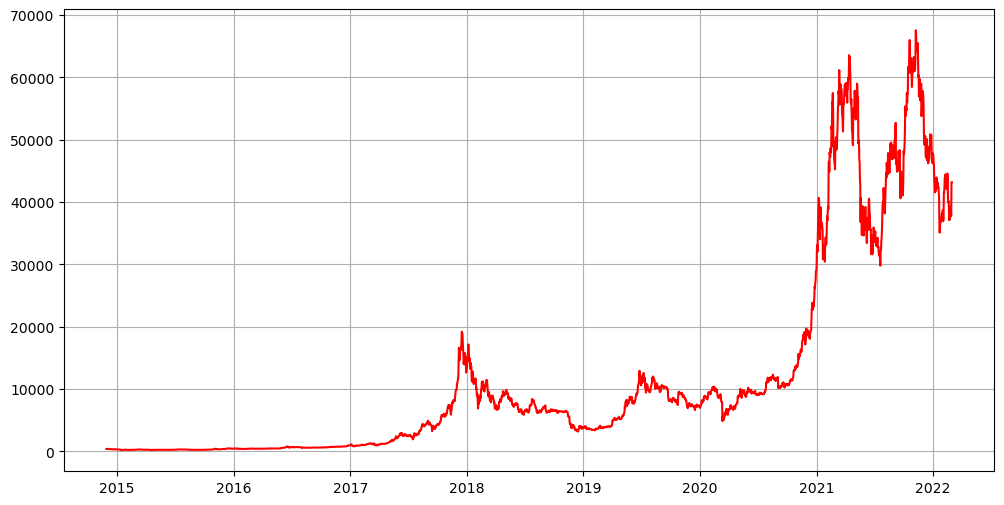

In [7]:
# Write your code here. Add as many boxes as you need.
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['close'], color='red')
plt.grid()
plt.show()

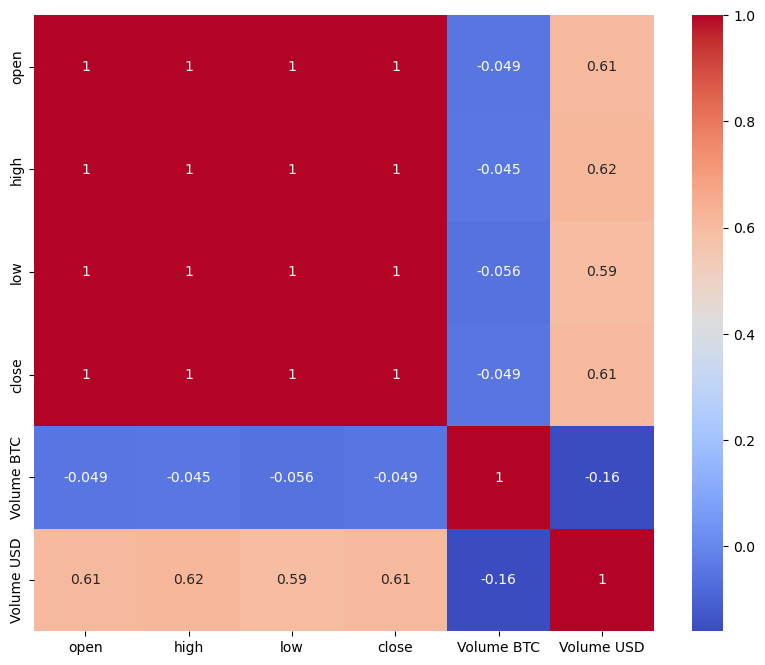

In [8]:
correlation = df.drop(columns=['symbol'],axis=1)
plt.figure(figsize=(10,8))
sns.heatmap(correlation.corr(), annot=True, cmap='coolwarm')
plt.show()

In [9]:
correlation.corr()

,open,high,low,close,Volume BTC,Volume USD
open,1.000000,0.999485,0.998983,0.998798,-0.048598,0.609992
high,0.999485,1.000000,0.998901,0.999474,-0.045371,0.617662
low,0.998983,0.998901,1.000000,0.999319,-0.056040,0.593531
close,0.998798,0.999474,0.999319,1.000000,-0.049489,0.608673
Volume BTC,-0.048598,-0.045371,-0.056040,-0.049489,1.000000,-0.160242
Volume USD,0.609992,0.617662,0.593531,0.608673,-0.160242,1.000000


# Feauture Extraction
Select the relevant features for prediction and apply a lag of up to 7 days to each chosen feature

Hint: Use `df['column_name'].shift(period)`. Check the documentation at https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html.

In [10]:
# Write your code here. Add as many boxes as you need.
features = ['Volume BTC', 'Volume USD']
for lag in range(1,8):
    for feature in features:
        df[f'{feature}_lag_{lag}'] = df[feature].shift(lag)
df.dropna(inplace=True)
df.head()

,symbol,open,high,low,close,Volume BTC,Volume USD,Volume BTC_lag_1,Volume USD_lag_1,Volume BTC_lag_2,...,Volume BTC_lag_3,Volume USD_lag_3,Volume BTC_lag_4,Volume USD_lag_4,Volume BTC_lag_5,Volume USD_lag_5,Volume BTC_lag_6,Volume USD_lag_6,Volume BTC_lag_7,Volume USD_lag_7
date,,,,,,,,,,,,,,,,,,,,,
2022-02-22,BTC/USD,37036.98,38463.88,36368.99,38269.94,2388.759035,9.141766e+07,1778.275258,6.628375e+07,6302.850957,...,2202.851827,8.642149e+07,912.724087,3.573010e+07,1701.817043,6.418008e+07,3160.618070,1.364723e+08,49.006289,2.116360e+06
2022-02-21,BTC/USD,38384.09,39494.11,36810.72,37076.60,3501.420364,1.298208e+08,2388.759035,9.141766e+07,1778.275258,...,6302.850957,2.418838e+08,2202.851827,8.642149e+07,912.724087,3.573010e+07,1701.817043,6.418008e+07,3160.618070,1.364723e+08
2022-02-20,BTC/USD,40108.62,40151.62,37974.18,38373.90,1283.511547,4.925334e+07,3501.420364,1.298208e+08,2388.759035,...,1778.275258,6.628375e+07,6302.850957,2.418838e+08,2202.851827,8.642149e+07,912.724087,3.573010e+07,1701.817043,6.418008e+07
2022-02-19,BTC/USD,40008.75,40471.27,39587.08,40109.02,695.654296,2.790201e+07,1283.511547,4.925334e+07,3501.420364,...,2388.759035,9.141766e+07,1778.275258,6.628375e+07,6302.850957,2.418838e+08,2202.851827,8.642149e+07,912.724087,3.573010e+07
2022-02-18,BTC/USD,40532.66,40996.31,39450.00,39996.99,2212.714920,8.850194e+07,695.654296,2.790201e+07,1283.511547,...,3501.420364,1.298208e+08,2388.759035,9.141766e+07,1778.275258,6.628375e+07,6302.850957,2.418838e+08,2202.851827,8.642149e+07


## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

**WARNING: DO NOT SHUFFLE THE DATASET.**



In [11]:
# Write your code here. Add as many boxes as you need.
X = df.drop(columns=features+['symbol','close'])
y = df['close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [12]:
n = len(X_train.columns)
n

17

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
expected_size = X_train.shape[0] * 17 * 1
expected_size

35955

## Neural Networks

Create an LSTM model and train it using the `train` function.

In [19]:
# Write your code here. Add as many boxes as you need.
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
X_train_lstm = X_train.reshape(X_train.shape[0], 1, n)
X_test_lstm = X_test.reshape(X_test.shape[0], 1, n)

model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train_lstm.shape[1],X_train_lstm.shape[2])),
    Dropout(0.3),
    LSTM(32),
    Dropout(0.3),
    Dense(1) 
])

F:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [21]:
history = model.fit(X_train_lstm, y_train, epochs=20, batch_size=32, validation_data=(X_test_lstm,y_test),verbose=1)

Epoch 1/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 472149888.0000 - val_loss: 104046.5859
Epoch 2/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 497044864.0000 - val_loss: 102325.0547
Epoch 3/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 493505376.0000 - val_loss: 99759.9922
Epoch 4/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 506139776.0000 - val_loss: 97564.8828
Epoch 5/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 502471488.0000 - val_loss: 95759.1250
Epoch 6/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 478891808.0000 - val_loss: 94220.8203
Epoch 7/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 498241760.0000 - val_loss: 92833.9766
Epoch 8/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 490434080.0000 - val_loss: 91575.0078
Epoch 9/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 454472192.0000 - val_loss: 90386.6797
Epoch 10/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 498830688.0000 - val_loss: 89258.2031
Epoch 11/20
67/67 ━━━━━━━━━━━━━━━━━━━

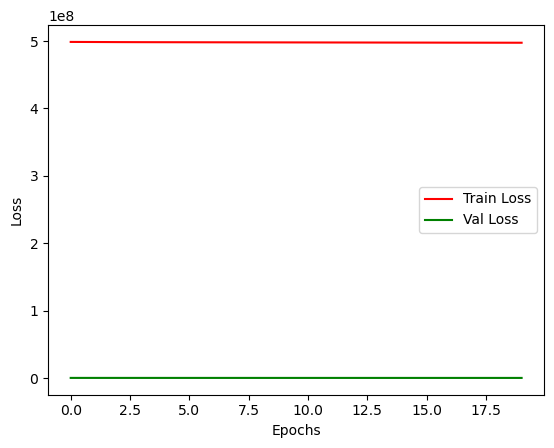

In [22]:
plt.plot(history.history['loss'], color='red',label='Train Loss')
plt.plot(history.history['val_loss'], color='green', label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Use the trained model to make predictions for the test set.

In [23]:
# Write your code here. Add as many boxes as you need.
y_pred = model.predict(X_test_lstm)

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [24]:
# Write your code here. Add as many boxes as you need.
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R2 Score: {r2:.4f}")

Mean Absolute Error: 269.7184
Mean Squared Error: 79293.4652
R2 Score: -11.1126


# Additional Bonus Task

Group the data by month. You can use [pandas.Grouper](https://pandas.pydata.org/docs/reference/api/pandas.Grouper.html) function.

Create an LSTM model to predict the 'close' price on a montly frequency.

In [25]:
df = df.drop(columns='symbol')

In [26]:
monthly_data = df.groupby(pd.Grouper(freq='M')).mean()
monthly_data.head()

C:\Users\Beqir\AppData\Local\Temp\ipykernel_3428\167305431.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = df.groupby(pd.Grouper(freq='M')).mean()


,open,high,low,close,Volume BTC,Volume USD,Volume BTC_lag_1,Volume USD_lag_1,Volume BTC_lag_2,Volume USD_lag_2,Volume BTC_lag_3,Volume USD_lag_3,Volume BTC_lag_4,Volume USD_lag_4,Volume BTC_lag_5,Volume USD_lag_5,Volume BTC_lag_6,Volume USD_lag_6,Volume BTC_lag_7,Volume USD_lag_7
date,,,,,,,,,,,,,,,,,,,,
2014-11-30,372.193333,383.310000,368.713333,375.446667,2.370867e+06,6302.890000,2.137462e+06,5650.693333,2.086602e+06,5513.140000,2.704199e+06,7133.793333,2.963277e+06,7868.636667,3.209339e+06,8574.846667,2.497136e+06,6705.486667,1.702409e+06,4560.330000
2014-12-31,343.688387,348.636452,336.454194,341.813548,2.890151e+06,8538.789677,2.841691e+06,8427.902581,2.793304e+06,8319.500000,2.892674e+06,8720.860323,3.160954e+06,9810.714516,3.139154e+06,9836.550645,3.111356e+06,9762.350323,3.081881e+06,9683.975484
2015-01-31,250.943226,260.632903,238.363871,247.703871,5.431845e+06,23554.290645,5.442109e+06,23649.966452,5.455051e+06,23745.176452,5.393740e+06,23661.505806,5.122960e+06,22747.398065,5.068056e+06,22571.979677,5.101751e+06,22724.570968,5.148346e+06,22929.604516
2015-02-28,233.012500,239.859643,226.930357,234.278214,1.906693e+06,8128.418929,1.904518e+06,8088.172143,1.943925e+06,8208.113929,2.012706e+06,8367.286071,2.038196e+06,8366.162143,2.113785e+06,8617.816786,2.144605e+06,8698.746429,2.148044e+06,8671.946071
2015-03-31,268.984516,274.261613,261.617419,268.596774,2.456041e+06,9173.153548,2.462770e+06,9206.859032,2.458673e+06,9210.024839,2.303273e+06,8656.766774,2.197412e+06,8279.277097,2.146471e+06,8100.144194,2.134720e+06,8067.679032,2.134147e+06,8080.085161


In [27]:
X_monthly = monthly_data.drop(columns=features+['close'])
y_monthly = monthly_data['close']

In [28]:
X_train_monthly, X_test_monthly, y_train_monthly, y_test_monthly = train_test_split(X_monthly, y_monthly
                                                                                   , test_size= 0.2, shuffle=False)

In [29]:
scaler_m = MinMaxScaler()
X_train_monthly = scaler_m.fit_transform(X_train_monthly)
X_test_monthly = scaler_m.transform(X_test_monthly)

In [31]:
X_train_lstm_monthly = X_train_monthly.reshape(X_train_monthly.shape[0], 1, n)
X_test_lstm_monthly = X_test_monthly.reshape(X_test_monthly.shape[0], 1, n)

In [32]:
model_monthly = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train_lstm_monthly.shape[1], X_train_lstm_monthly.shape[2])),
    Dropout(0.3),
    LSTM(32),
    Dropout(0.3),
    Dense(1)
])

F:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [33]:
model_monthly.compile(optimizer='adam', loss='mean_squared_error')

In [34]:
history_monthly = model_monthly.fit(
    X_train_lstm_monthly, y_train_monthly,
    epochs=20, batch_size=32, validation_data=(X_test_lstm_monthly, y_test_monthly), verbose=1
)

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 200ms/step - loss: 36193128.0000 - val_loss: 1796104704.0000
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 34828528.0000 - val_loss: 1796100736.0000
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 35275936.0000 - val_loss: 1796096384.0000
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 37889240.0000 - val_loss: 1796091776.0000
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 39629268.0000 - val_loss: 1796086656.0000
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 35608072.0000 - val_loss: 1796080896.0000
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 35169952.0000 - val_loss: 1796073856.0000
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 34725512.0000 - val_loss: 1796065792.0000
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 36262224.0000 - val_loss: 1796055808.0000
Epoch 10/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 34404440.0000 - val_loss: 1796044288.0000
Epoch 11

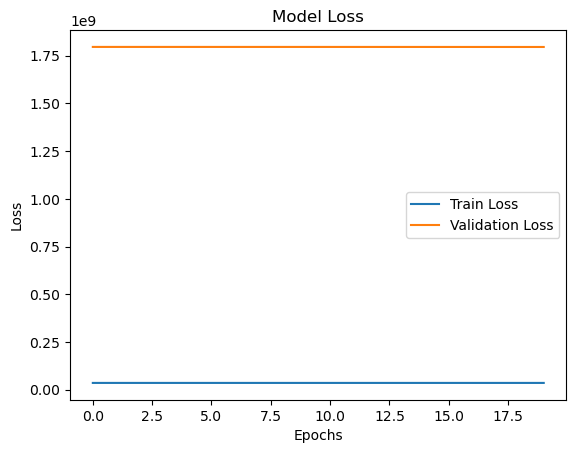

In [35]:
plt.plot(history_monthly.history['loss'], label='Train Loss')
plt.plot(history_monthly.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [36]:
y_pred_monthly = model_monthly.predict(X_test_lstm_monthly)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


In [37]:
mae_monthly = mean_absolute_error(y_test_monthly, y_pred_monthly)
mse_monthly = mean_squared_error(y_test_monthly, y_pred_monthly)
r2_monthly = r2_score(y_test_monthly, y_pred_monthly)

print(f"Monthly Prediction - MAE: {mae_monthly:.4f}")
print(f"Monthly Prediction - MSE: {mse_monthly:.4f}")
print(f"Monthly Prediction - R2 Score: {r2_monthly:.4f}")

Monthly Prediction - MAE: 39601.8120
Monthly Prediction - MSE: 1795805254.5127
Monthly Prediction - R2 Score: -6.8930
